# Digital Signal Processing

### MsCV - ViBOT - MAIA

The reasons to convert signals into frequency domain is to get the idea of different frequency components it is composed of. This might help to detect the required signals and classify them, for examples, speak or speech recognition from a sound wave, noise removal from the image, or finding recurring patterns within images. 

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from scipy.stats import norm
from scipy import signal


Pretty printing has been turned OFF


# Discrete Fourier Transform
The Discrete Fourier Transform (DFT) converts discrete data from a time domain into frequency domain. The DFT analyzes the finite segment in one period of an infinitely extended periodic signal, which is defined as: 
$$ X[n] = \sum^{N-1}_{k = 0} x[k] e^{-j(2\pi/N)kn}$$


Note: The Fast Fourier Transform (FFT) is simply an algorithm to compute the DFT in a faster way!

## Exercise 1 -  ** DFT** 
**1.1** The DFT of a $5$ Hz sin wave sampled with the sampling of $f_s = 50$ Hz over 1000 (N = 1000) samples is computed as follows:


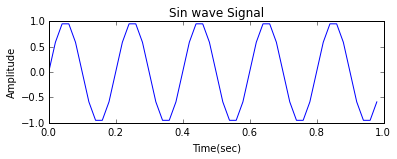

/home/masters/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


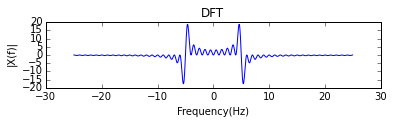

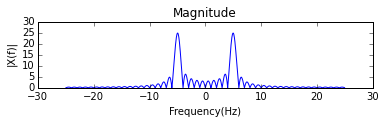

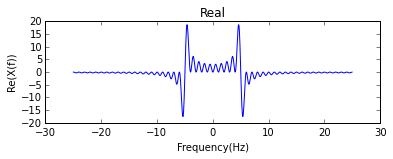

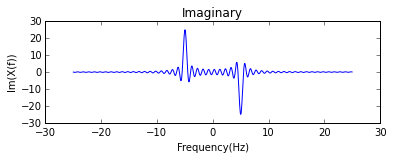

In [2]:
# Signal frequency and sampling frequency
f = 5.
fs = 50.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# sin wave 
x_n = np.sin(2*np.pi*f*t)
# Number of samples 
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_n, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n)
plt.title('Sin wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()


# In the sin wave:
# the peaks in the real part of the frequency domain are both positive and negative. 
# in the imaginary part of the frequency domain there is one positive peak, and then one negative. 


**1.2** Compute the DFT of a cosine wave, how that differs from that of a sine wave ?

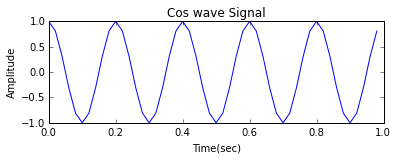

/home/masters/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


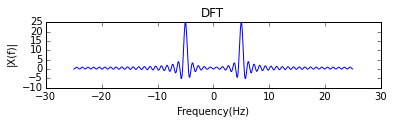

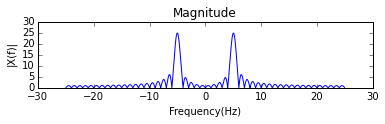

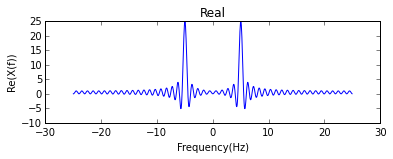

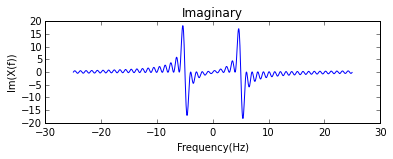

In [3]:


# Signal frequency and sampling frequency
f = 5.
fs = 50.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# sin wave 
x_n = np.cos(2*np.pi*f*t)
# Number of samples 
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_n, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n)
plt.title('Cos wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

# In the cos wave:
# the peaks in the real part of the frequency domain are only positive.
# the peaks in the imaginary part of the frequency domain are both positive and negative. 

**1.3** Use square wave using the same frequncy and sampling frequency.

Note use `signal.square` to create your signal. 

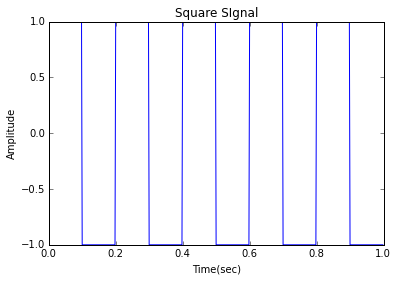

/home/masters/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


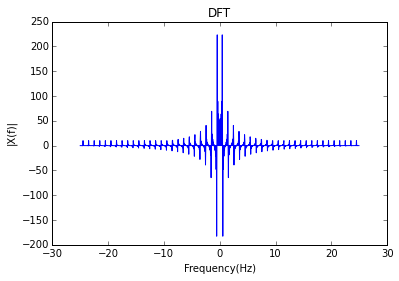

In [17]:
from scipy import signal

# Time vector for one second
t = np.linspace(0, 1, 500, endpoint=False)

# Square Signal
square = signal.square(2 * np.pi * 5 * t)

# Using fftshift 
N = 1000
fr = (np.arange(-N/2,N/2,1)) * fs/N
square_f = np.fft.fftshift(np.fft.fft(square, N))

plt.figure
plt.plot(t, square)
plt.title('Square SIgnal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.figure
plt.plot(fr, square_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()



**1.4** Use white Gaussian noise N = 10000. 

(Note use `np.random.normal` to create your noise) 

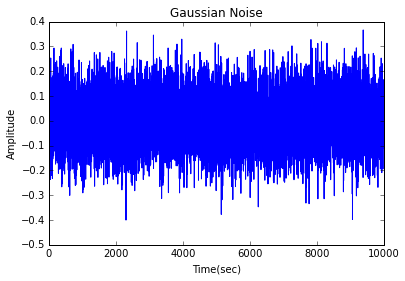

/home/masters/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


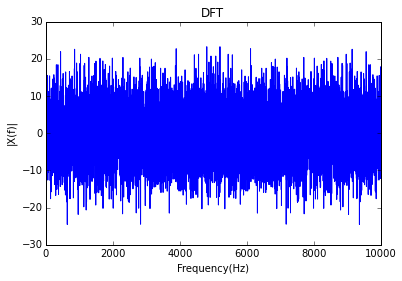

In [25]:
mu = 0        # mean
sigma = 0.1  #standard deviation
N = 10000

#Creating the gaussian noise
gaus_noise = np.random.normal(mu, sigma, N)


# Applyin fourier transform
fr = ( np.arange (-N/2, N/2, 1) ) * fs/N
gaus_f = np.fft.fftshift(np.fft.fft(gaus_noise, N))

plt.figure
plt.plot(gaus_noise)
plt.title('Gaussian Noise')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.figure
plt.plot( gaus_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

## Exercise 2 -  Sampling 

Generate and display the following signals of 1 sec duration.
$$x[n] = 3 cos(2\pi\frac{f_{1}}{f_{s}}n) + 4 sin(2\pi\frac{f_{2}}{f_{s}}n)$$
for $f_{1} = 5$ Hz and $f_{2} = 20$ Hz, sampled with the sampling frequencies of $f_{s} = [10, 20, 25, 40, 50, 100, 150]$


**2.1** Plot $x[n]$ for different sampling frequencies in time domain.

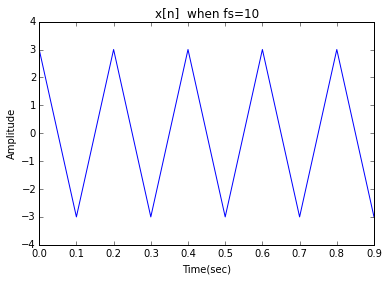

/home/masters/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


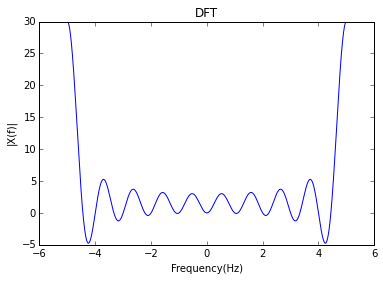

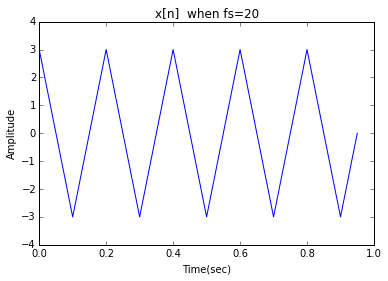

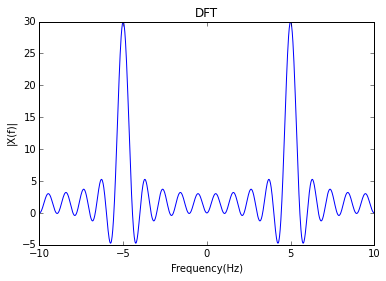

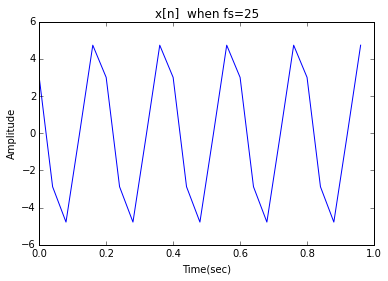

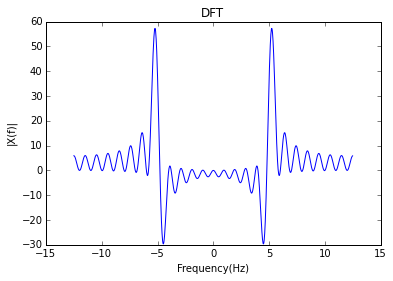

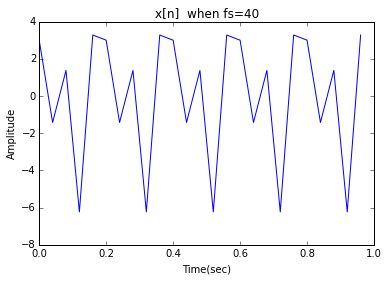

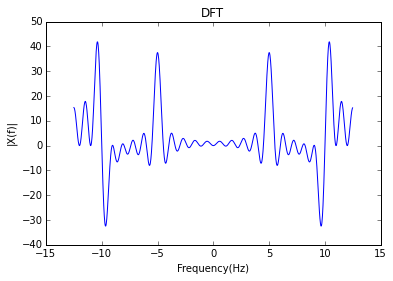

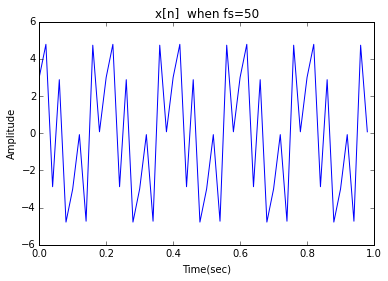

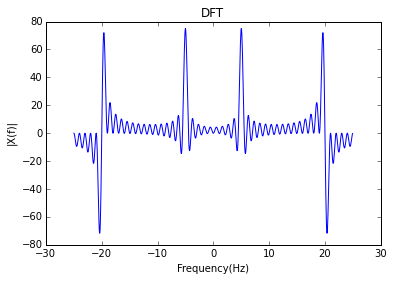

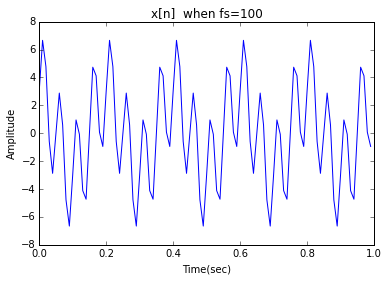

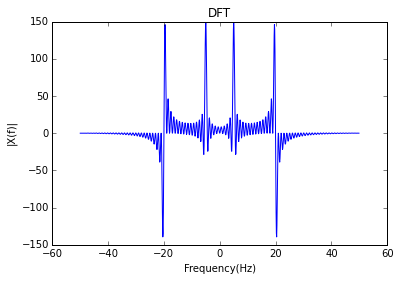

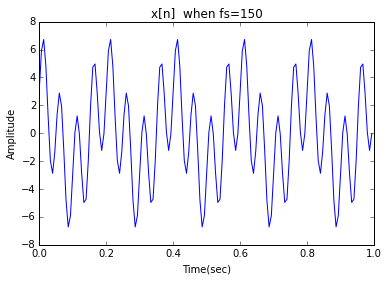

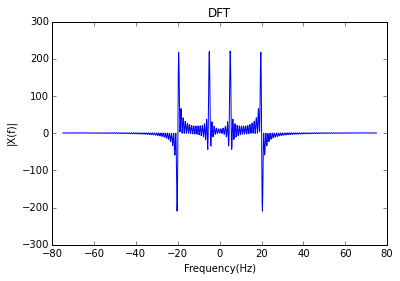

In [56]:
###### FS = 10 ###### 
f1 = 5.
f2 = 20.
fs = 10.
N = 1000

# time vector for one second
n = np.arange(0, 1., 1./fs)


# making the ecuation
x_n = (3 * np.cos(2 * np.pi * f1 * n) ) + ( 4 * np.sin (2 * np.pi * f2 * n) )

# displaying x(n)
plt.figure
plt.plot(n, x_n)
plt.title('x[n]  when fs=10')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

# Applying fourier transform
fr = ( np.arange (-N/2, N/2, 1) ) * fs/N
x_f = np.fft.fftshift(np.fft.fft(x_n, N))

#Displaying fft
plt.figure
plt.plot( fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

#-----------------------------------------#
###### FS = 20 ###### 
#-----------------------------------------#
f1 = 5.
f2 = 20.
fs = 20.
N = 1000

# time vector for one second
n = np.arange(0, 1., 1./fs)

# making the ecuation
x_n = (3 * np.cos(2 * np.pi * f1 * n) ) + ( 4 * np.sin (2 * np.pi * f2 * n) )

# displaying x(n)
plt.figure
plt.plot(n, x_n)
plt.title('x[n]  when fs=20')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

# Applying fourier transform
fr = ( np.arange (-N/2, N/2, 1) ) * fs/N
x_f = np.fft.fftshift(np.fft.fft(x_n, N))

#Displaying fft
plt.figure
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()



#-----------------------------------------#
###### FS = 25 ###### 
#-----------------------------------------#
f1 = 5.
f2 = 20.
fs = 25.
N = 1000

# time vector for one second
n = np.arange(0, 1., 1./fs)

# making the ecuation
x_n = (3 * np.cos(2 * np.pi * f1 * n) ) + ( 4 * np.sin (2 * np.pi * f2 * n) )

# displaying x(n)
plt.figure
plt.plot(n, x_n)
plt.title('x[n]  when fs=25')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

# Applying fourier transform
fr = ( np.arange (-N/2, N/2, 1) ) * fs/N
x_f = np.fft.fftshift(np.fft.fft(x_n, N))

#Displaying fft
plt.figure
plt.plot( fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()


#-----------------------------------------#
###### FS = 40 ###### 
#-----------------------------------------#
f1 = 5.
f2 = 40.
fs = 25.
N = 1000

# time vector for one second
n = np.arange(0, 1., 1./fs)

# making the ecuation
x_n = (3 * np.cos(2 * np.pi * f1 * n) ) + ( 4 * np.sin (2 * np.pi * f2 * n) )

# displaying x(n)
plt.figure
plt.plot(n, x_n)
plt.title('x[n]  when fs=40')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

# Applying fourier transform
fr = ( np.arange (-N/2, N/2, 1) ) * fs/N
x_f = np.fft.fftshift(np.fft.fft(x_n, N))

#Displaying fft
plt.figure
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()




#-----------------------------------------#
###### FS = 50 ###### 
#-----------------------------------------#
f1 = 5.
f2 = 20.
fs = 50.
N = 1000

# time vector for one second
n = np.arange(0, 1., 1./fs)

# making the ecuation
x_n = (3 * np.cos(2 * np.pi * f1 * n) ) + ( 4 * np.sin (2 * np.pi * f2 * n) )

# displaying x(n)
plt.figure
plt.plot(n, x_n)
plt.title('x[n]  when fs=50')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

# Applying fourier transform
fr = ( np.arange (-N/2, N/2, 1) ) * fs/N
x_f = np.fft.fftshift(np.fft.fft(x_n, N))

#Displaying fft
plt.figure
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

#-----------------------------------------#
###### FS = 100 ###### 
#-----------------------------------------#
f1 = 5.
f2 = 20.
fs = 100.
N = 1000

# time vector for one second
n = np.arange(0, 1., 1./fs)

# making the ecuation
x_n = (3 * np.cos(2 * np.pi * f1 * n) ) + ( 4 * np.sin (2 * np.pi * f2 * n) )

# displaying x(n)
plt.figure
plt.plot(n, x_n)
plt.title('x[n]  when fs=100')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

# Applying fourier transform
fr = ( np.arange (-N/2, N/2, 1) ) * fs/N
x_f = np.fft.fftshift(np.fft.fft(x_n, N))

#Displaying fft
plt.figure
plt.plot( fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()


#-----------------------------------------#
###### FS = 150 ###### 
#-----------------------------------------#
f1 = 5.
f2 = 20.
fs = 150.
N = 1000

# time vector for one second
n = np.arange(0, 1., 1./fs)

# making the ecuation
x_n = (3 * np.cos(2 * np.pi * f1 * n) ) + ( 4 * np.sin (2 * np.pi * f2 * n) )

# displaying x(n)
plt.figure
plt.plot(n, x_n)
plt.title('x[n]  when fs=150')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

# Applying fourier transform
fr = ( np.arange (-N/2, N/2, 1) ) * fs/N
x_f = np.fft.fftshift(np.fft.fft(x_n, N))

#Displaying fft
plt.figure
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

**2.2.** Discuss the aliasing effects in the time domain:

**2.3** Compute the FFT of the above signals and display their centered frequency components.
Discuss your observations.

In [ ]:
# We have to centers for the frequencies: 5 for the cosine and 20 for the sine
# Due to the size of our sampling frequency fs, we cannot observe this centers at the beginning (when fs=10,20,25)
# When we have a sample frequency big enough, like fs=40, we can start to appreciate both peaks (sine and cosine)
# When fs = 50 or bigger we can appreciate better both centers (5 for cosine, 20 for sine)
# If both signals had the same center we could have appreciated them from the beginning, when fs = 20.

## Exercise 3 - 1D  DFT for image classification

1D DFT can be applied to analyze the frequency components along the one dimensional profile of an image. Here we want to use these information to classify the images into two different classes (**barcode** and **non-barcode** classes)
To do so we first 
* Load the images from 1D-DFT folder
    * **3.1** you have to normalize and resize the images to the smallest size 
    * **3.2** Take 1D profile as shown in the example and compute its DFT.
![](profile1.png)
    
    * **3.3** Separate the images to two different groups of **barcode** and **non-barcode** based on their frequency spectrum of their profile 
* Some information regarding the images:
    * There are 54 images while Images [1, 2, 6, 44:54] are barcode images and the others are similar patterns.
    
**3.4** Discuss your results

In [60]:
Path = '../images/1D-DFT/'
import os, os.path
from skimage import color
from scipy import misc


filenames = sorted([f for f in os.listdir(Path)])

for f in filenames:
    Img = io.imread(os.path.join(Path,f))
    #plt.figure()
    #io.imshow(Img)
    
    #Getting the size of an image
    #Img.shape
    width, height = Img.size
    
    #showing weight and height
    print (width, height)
    
    
 

    

TypeError: 'int' object is not iterable

In [ ]:
   #Resize and saving the image   
    image = resize(im, (48, 48))
    imsave('test.jpg',im)
    imsave('test1.jpg',image)
    
 
    Img = Img.astype('float32')
    if Img.max() > 1.0:
        Img/= 255.0
        
  
    